# Import the Packages

In [86]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import sum
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
from torchsummary import summary

# set figure size
plt.rcParams["figure.figsize"] = (14,7)

### check the cude availibility 

In [87]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


## Read the data

In [88]:
df = pd.read_excel("CreditCardDataset.xlsx")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


In [89]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
57350,172751,2.085387,-0.033624,-1.706889,-0.015100,0.644669,-0.245303,0.125758,-0.156508,0.277994,...,0.256304,0.862281,-0.063211,0.143339,0.361885,-0.124856,-0.025472,-0.066836,2.27,0
57351,172760,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0
57352,172768,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,2.016666,-1.588269,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0
57353,172770,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,...,-0.208260,-0.430347,0.416765,0.064819,-0.608337,0.268436,-0.028069,-0.041367,3.99,0
57354,172777,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0


In [90]:
print("Credit Card Fraud Detection data -  rows:",df.shape[0]," columns:", df.shape[1])

Credit Card Fraud Detection data -  rows: 57355  columns: 31


In [91]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


In [92]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [93]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.14 % of the dataset
Frauds 0.86 % of the dataset


C:\Users\semal\AppData\Local\Temp\ipykernel_15100\4075362478.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



Text(0, 0.5, 'Frequency')

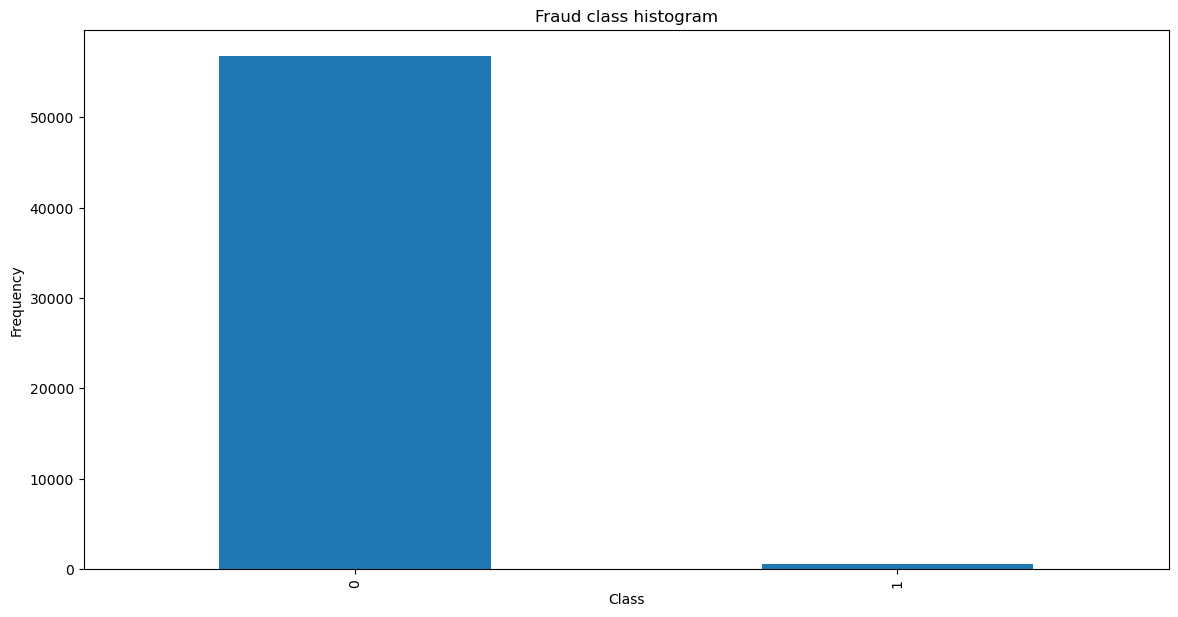

In [95]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

By seeing the distributions we can see how skewed are these features, data is highly unbalanced with respect with target variable Class.

In [96]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

## scaling the data using robust scaler

In [97]:
from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.672034,0
1,0.000000,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256493,0
2,0.000029,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.263353,0
3,0.000052,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,0.077144,0
4,0.000058,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,-0.084004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57350,0.999850,2.085387,-0.033624,-1.706889,-0.015100,0.644669,-0.245303,0.125758,-0.156508,0.277994,...,0.256304,0.862281,-0.063211,0.143339,0.361885,-0.124856,-0.025472,-0.066836,-0.276094,0
57351,0.999902,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,-0.033602,0
57352,0.999948,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,2.016666,-1.588269,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,-0.182569,0
57353,0.999959,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,...,-0.208260,-0.430347,0.416765,0.064819,-0.608337,0.268436,-0.028069,-0.041367,-0.252013,0


In [98]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19116,0.375170,1.211150,-0.074143,0.480383,0.699467,-0.450623,-0.094783,-0.273276,0.090783,0.445203,...,-0.065454,0.011677,-0.134237,0.060080,0.587332,0.442786,-0.022377,-0.004020,-0.255653,0
6396,0.209695,-0.818676,-0.091339,1.650491,1.604389,-1.966174,1.645389,-0.122364,-1.449100,0.034532,...,1.676372,-0.126248,-1.389380,0.309718,0.919529,0.037793,0.470451,0.096854,6.458663,0
18391,0.365169,1.345079,-0.499139,0.446691,-0.685122,-1.050795,-0.718931,-0.538536,-0.097319,-1.114680,...,-0.398387,-0.701844,0.097057,0.348649,0.117093,0.931324,-0.058474,0.000457,-0.167868,0
56572,0.982225,1.817846,-1.293668,-1.522930,-0.288284,-0.722445,-0.665967,-0.254415,-0.165566,-0.305803,...,0.064686,0.374278,-0.154451,-0.360628,0.114740,-0.031304,-0.033603,-0.040853,2.149247,0
27726,0.475839,-4.815253,4.426459,-2.408245,-0.465503,-2.126493,0.044684,-0.673897,2.353361,0.405313,...,-0.140276,-0.496082,0.212004,-0.813968,0.481201,-0.729286,-0.848899,-0.438493,1.673084,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,0.890835,-0.472792,0.447113,2.308737,-0.155177,-0.319296,-0.079044,0.339361,-0.027880,0.436181,...,0.101701,0.527836,-0.458751,0.011346,0.301657,0.813052,-0.139643,-0.165501,-0.146867,0
32511,0.658203,-1.328278,0.296547,0.849960,-1.169919,1.536158,-1.018163,0.732298,-0.073945,-0.006568,...,0.271873,0.607960,-0.612213,0.599289,1.182707,-0.410820,-0.136188,0.121168,-0.293875,0
5192,0.194669,1.257019,0.428126,0.327293,0.683651,-0.281120,-1.049184,0.155771,-0.261628,-0.121491,...,-0.275899,-0.746607,0.117166,0.373212,0.250477,0.090995,-0.016426,0.033009,-0.282814,0
12172,0.283930,0.734595,-0.628553,2.198799,2.985872,-0.889549,2.808512,-1.571480,1.076349,1.270210,...,0.223116,1.108707,0.020374,-0.606600,0.058526,0.356989,0.149560,0.034992,0.469723,0


In [100]:
fraud = new_df.loc[new_df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

fraudulent transactions dont tend to have a large sum of cash per transaction, we can confirm this by calculating some statistics such as max, min and mean for each type of transaction.

## Splitting the using train-test-split method for training and testing 

In [101]:
# split data into training and testing
X = new_df.drop("Class", axis=1)
y = new_df["Class"]

# scale the values of x (better training)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # stratify keeps class balance

## Training Neural Network using Pytorch 

In [102]:
# create tensor datasets from df
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train.values)
y_test = torch.FloatTensor(y_test.values)
train_ds = TensorDataset(X_train, y_train)
val_ds = TensorDataset(X_test, y_test)

In [103]:
# create dataloaders
batch_size = 128
train_dl = DataLoader(train_ds, batch_size=batch_size)
val_dl = DataLoader(val_ds, batch_size=256)

## Neural network Architecture 

In [104]:
# Network Architecture
class FraudNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=4):
        super().__init__()
        self.input = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU()
        )
        # make the number of hidden dim layers configurable
        self.layers = nn.ModuleList()
        for i in range(num_layers):
            self.layers.append(nn.Linear(hidden_dim, hidden_dim))
            self.layers.append(nn.ReLU())

        # final layer
        self.fc = nn.Linear(hidden_dim, 2)

    def forward(self, x):
        out = self.input(x)
        for layer in self.layers:
            out = layer(out)
        return self.fc(out)

### Train the model

In [105]:
#training model

def train_model(model, epochs, loss_fn, optimizer, train_dl, val_dl):
    
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    model.train()
    for epoch in range(epochs):
        train_loss = 0.0 
        correct_train = 0
        total_train = 0
        
        with tqdm(train_dl, unit="batch") as tepoch:
            for data, target in tepoch:
                data, target = data.to(device), target.to(device)
                tepoch.set_description(f"Epoch {epoch}")
                optimizer.zero_grad()
                preds = model(data)
                loss = loss_fn(preds, target.long())
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item() * data.size(0)
                
                # Update training accuracy
                _, predicted = torch.max(preds.data, 1)
                total_train += target.size(0)
                correct_train += (predicted == target).sum().item()
                
                tepoch.set_postfix(loss=loss.item())
                
            # calculate average training loss for the epoch
            train_loss = train_loss / len(train_dl.dataset)
            train_accuracy = correct_train / total_train
            
            train_losses.append(train_loss)  
            train_accuracies.append(train_accuracy)
            
            # evaluate on validation set
            val_loss = 0.0
            correct_val = 0
            total_val = 0
            
            model.eval()
            with torch.no_grad():
                for data, target in val_dl:
                    data, target = data.to(device), target.to(device)
                    preds = model(data)
                    loss = loss_fn(preds, target.long())
                    val_loss += loss.item() * data.size(0)
                    
                    # Update validation accuracy
                    _, predicted = torch.max(preds.data, 1)
                    total_val += target.size(0)
                    correct_val += (predicted == target).sum().item()
            
            # calculate average validation loss for the epoch
            val_loss = val_loss / len(val_dl.dataset)
            val_accuracy = correct_val / total_val
            
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)
            
    return train_losses, val_losses, train_accuracies, val_accuracies


Training Loop: The training loop iterates over the specified number of epochs, performing forward and backward passes for each batch of data in the training DataLoader. It updates the model parameters based on the calculated loss and optimizer.

Validation: After each epoch, the model's performance is evaluated on the validation dataset. This helps monitor the model's generalization and prevents overfitting.

Loss and Accuracy Tracking: Train and validation losses are recorded for each epoch to track the model's performance over time. Additionally, train and validation accuracies are calculated to understand how well the model is learning to classify the data.

Progress Bar: The tqdm library is used to create a progress bar for the training loop, providing visual feedback on the training progress for each epoch.

Model Evaluation: During the validation phase, the model is set to evaluation mode using model.eval() to disable gradient calculation and batch normalization. This ensures that the model behaves consistently during evaluation and prevents any unnecessary computations.

By tracking loss and accuracy metrics, it enables monitoring the model's performance and making necessary adjustments to improve its effectiveness. Additionally, the use of tqdm provides a convenient way to visualize the training progress, making the training process more informative and user-friendly. Overall, this training function serves as a solid foundation for training various neural network architectures on different datasets.

In [106]:
inp_size = X_train.shape[1]
model = FraudNet(inp_size, inp_size).to(device)
loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),  lr = 1e-4)

# summarize the model layers
summary(model, (inp_size, inp_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 30, 30]             930
              ReLU-2               [-1, 30, 30]               0
            Linear-3               [-1, 30, 30]             930
              ReLU-4               [-1, 30, 30]               0
            Linear-5               [-1, 30, 30]             930
              ReLU-6               [-1, 30, 30]               0
            Linear-7               [-1, 30, 30]             930
              ReLU-8               [-1, 30, 30]               0
            Linear-9               [-1, 30, 30]             930
             ReLU-10               [-1, 30, 30]               0
           Linear-11                [-1, 30, 2]              62
Total params: 4,712
Trainable params: 4,712
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/back

The input layer has an input shape of [-1, input_size, input_size], which seems appropriate for processing input data with dimensions input_size x input_size. The output layer has a shape of [-1, num_classes], indicating that the model outputs class probabilities for each input sample.

There are multiple hidden layers, each followed by a ReLU activation function. 

The model has a total of 4,712 parameters, ReLU activation functions are used after each linear layer.

The architecture is relatively shallow, consisting of only a few layers. While shallow networks are computationally less expensive and easier to train, they may struggle to capture complex patterns in the data compared to deeper networks.

## Visualize loss and accuracy 

Epoch 9: 100%|██████████| 314/314 [00:02<00:00, 121.08batch/s, loss=0.00166]


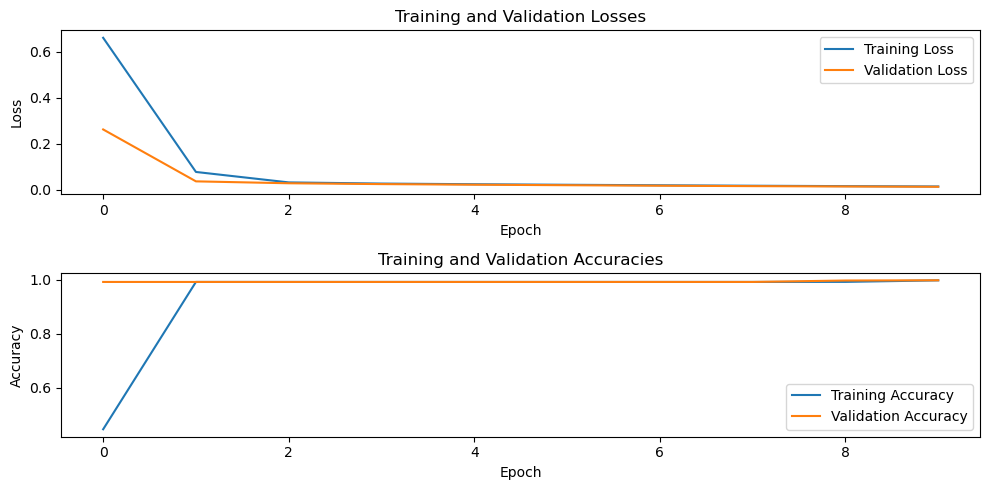

In [107]:
epochs = 10
# Call the train_model function
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, epochs, loss, optim, train_dl, val_dl)


import matplotlib.pyplot as plt
%matplotlib inline

# Plotting losses
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

# Plotting accuracies
plt.subplot(2, 1, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()

plt.tight_layout()
plt.show()

The training loss is the error of the model on the training set. The validation loss is the error of the model on the validation set, which is a separate dataset from the training set. The validation loss is used to assess how well the model is generalizing to unseen data.

In the graph, the training loss decreases rapidly in the first few epochs, and then it starts to plateau. This suggests that the model is learning quickly at first, but then it starts to overfit to the training data. The validation loss also decreases, but it does not decrease as much as the training loss. This suggests that the model is starting to overfit to the training data.

The training loss is consistently lower than the validation loss. This is a good sign, as it suggests that the model is not overfitting to the training data.
The validation loss is still decreasing, although it is decreasing more slowly than the training loss. This suggests that the model is still learning, but it is also starting to overfit to the training data.

### Classification Report

In [108]:
model.eval()
preds = model(X_test.to(device)).argmax(dim=1)
print(classification_report(y_test, preds.cpu()))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17059
         1.0       0.96      0.74      0.84       148

    accuracy                           1.00     17207
   macro avg       0.98      0.87      0.92     17207
weighted avg       1.00      1.00      1.00     17207



key takeaways:

- The model performs very well on the majority class (class 0) with high precision, recall, and F1-score.
- The model struggles with the minority class (class 1) with lower recall (missing instances) and F1-score.
- Overall accuracy is high (100%) but can be misleading due to the class imbalance.

model does have some issue with classifiying fraudulent transactions, this can be addressed in multiple ways:

- using the same amount of data for both classes
- generating more data for fraudulent class 1
- using a deeper network (more layers)
- using a different network architecture